In [ ]:
from pathlib import Path
drive_dir = Path("../")

import sys
import os
module_path = os.path.abspath(str(drive_dir))
sys.path.insert(0, module_path)

import pandas as pd
import seaborn as sns

import katspace
import katspace.core
import katspace.data
import katspace.plot


import importlib
for mod in ["katspace.core", "katspace.data", "katspace.plot"]:
    importlib.reload(sys.modules[mod])

from katspace.data import  non_empty_labels_from_iter
from katspace.plot import beginning_history_preprocess, prep_plot_compare_new, plot_compare, calculate_ratios2

import matplotlib.pyplot as plt

data_dir = Path(drive_dir, "data-test/")
results_dir = Path(data_dir, "results/predict-286-gutenberg/")

space_types = ("perceived_space", "action_space", "visual_space", "descriptive_space", "no_space")
notebooks_dir =  Path(drive_dir, "notebooks/")

canon_df = pd.read_excel(Path(data_dir, "20240818_canon_master_merged.xlsx", index = 0))

In [ ]:
#read parquet

from pandas.io.parquet import read_parquet
fp_labels_df = Path(data_dir, "results/2024_08_16_labels_df.parquet")
results_df = read_parquet(fp_labels_df)

fp_labels_cn = Path(data_dir, "results/2025_02_05_labels_df_canon.parquet")
results_canon = read_parquet(fp_labels_cn)
results_canon = {filename: list(non_empty_labels_from_iter(iter(results_canon[filename]))) for filename in results_canon.columns}

results = {filename: list(non_empty_labels_from_iter(iter(results_df[filename]))) for filename in results_df.columns}
gutenberg_df = pd.read_excel(Path(data_dir, "20231216_1_gutenberg_master.xlsx"), index_col = 0)


years = gutenberg_df["year"].unique()
files_year = {
    year : gutenberg_df[gutenberg_df.year == year]["filename"].to_list() for year in years 
}

In [3]:
def get_years_dict(df):
    temp_df = df.set_index("filename")["year"]
    years = temp_df.to_dict()
    return years

In [4]:
df = gutenberg_df.query("year > 1780 and year < 1940")
df = beginning_history_preprocess(results, chunk_size = 15, years = get_years_dict(df), return_df = True)
df["no_space"] = df["total"] - df["all_space"]
df = calculate_ratios2(df, insert_values=True, suffix="")
df = katspace.plot.smooth_df(df, set_index = False, trim_window = False)
df

,year,filename,total,perceived_space,action_space,visual_space,descriptive_space,all_space,no_space
0,1917,Arthur_Achleitner_-_Der_Finanzer.txt,15,0.200000,0.266667,0.0,0.000000,0.466667,0.533333
1,1904,Arthur_Achleitner_-_Das_Schloß_im_Moor.txt,15,0.400000,0.200000,0.0,0.200000,0.800000,0.200000
2,1897,Arthur_Achleitner_-_Familie_Lugmüller.txt,15,0.266667,0.066667,0.0,0.000000,0.333333,0.666667
3,1902,Arthur_Achleitner_-_Der_Bezirkshauptmann._Erst...,15,0.400000,0.066667,0.0,0.000000,0.466667,0.533333
4,1911,Arthur_Achleitner_-_Geschichten_aus_den_Bergen...,15,0.266667,0.066667,0.0,0.066667,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...
4548,1921,"Zweig,_Arnold_-_Die_Novellen_um_Claudia-52478.txt",15,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
4549,1928,"Zweig,_Friderike_Maria_Burger_Winternitz_-_Vög...",15,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
4550,1931,"Zweig,_Stefan_-_Amok:_Novellen_einer_Leidensch...",15,0.066667,0.000000,0.0,0.000000,0.066667,0.933333
4551,1920,"Zweig,_Stefan_-_Brennendes_Geheimnis:_Erzählun...",15,0.333333,0.133333,0.0,0.000000,0.466667,0.533333


In [ ]:
gutenberg_df = gutenberg_df.drop(gutenberg_df[gutenberg_df["total"] == 0].index)
gutenberg_df[gutenberg_df["total"] == 0]

canon_df = canon_df.drop(canon_df[canon_df["total"] == 0].index)

,author_last,author_first,title,filename,year,perceived_space,action_space,visual_space,descriptive_space,no_space,total,all_space,genre_3,period,gender


In [ ]:
#list all filenames in our database
[filename for filename in canon_df["filename"] if filename not in results.keys()]

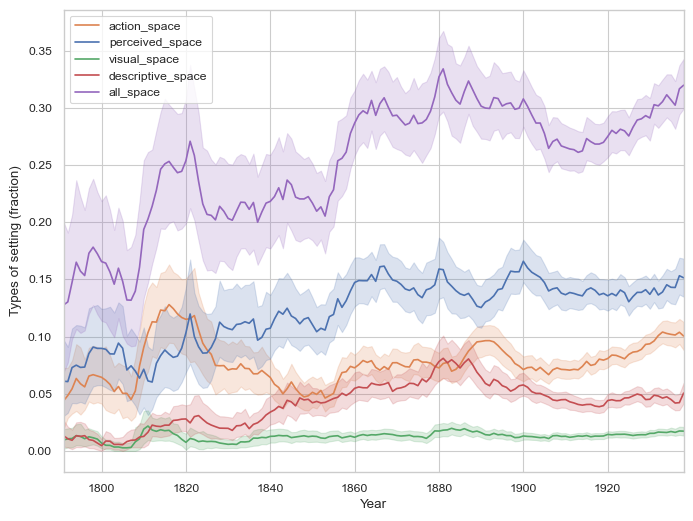

In [10]:
df = gutenberg_df.query("year > 1780 and year < 1940")
df = beginning_history_preprocess(results, chunk_size = 15, years = get_years_dict(df), return_df = True)
df["no_space"] = df["total"] - df["all_space"]

def plot_smooth_space(df):
    gutenberg_df = df
    sel = (df["year"] > 1780) & (df["year"] < 1940)
    plot_df = katspace.plot.calculate_ratios(df[sel])
    smooth_df =  katspace.plot.smooth_df(plot_df[["action_space_rt", "perceived_space_rt", "visual_space_rt", "descriptive_space_rt", "all_space_rt"]])

    sns.set_context("paper")
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(8, 6))

    lines = sns.lineplot(smooth_df, palette=["#dd8452", "#4c72b0", "#55a868", "#c44e52", "#9467bd"], dashes=False)
    handles, labels = lines.get_legend_handles_labels()
    custom_labels = ['action_space', 'perceived_space', 'visual_space', 'descriptive_space', 'all_space']
    
   
    plt.legend(handles=handles[:5], labels=custom_labels)
    plt.ylabel("Types of setting (fraction)")
    plt.xlabel("Year")

    ax = plt.gca()  # Get the current axis
    ax.set_xmargin(0)
    

plot_smooth_space(df)

In [ ]:
space_type_d = {'action_space' :         [{"color": "#dd8452", "dashes" : True, "scale" : 1}, {"color": "#dd8452", "dashes" : False, "scale" : 1}], 
                'perceived_space' :      [{"color": "#4c72b0", "dashes" : True, "scale" : 1}, {"color": "#4c72b0", "dashes" : False, "scale" : 1}], 
                'visual_space' :         [{"color": "#55a868", "dashes" : True, "scale" : 1}, {"color": "#55a868", "dashes" : False, "scale" : 1}], 
                'descriptive_space' :    [{"color": "#c44e52", "dashes" : True, "scale" : 1}, {"color": "#c44e52", "dashes" : False, "scale" : 1}], 
                'all_space' :            [{"color": "#9467bd", "dashes" : True, "scale" : 1}, {"color": "#9467bd", "dashes" : False, "scale" : 1}]}

color_indexer = {'action_space': 1,
 'perceived_space': 0,
 'visual_space': 2,
 'descriptive_space': 3,
 'all_space': 4}

palettes = {space_type : [sns.color_palette("muted").as_hex()[i], sns.color_palette("tab10").as_hex()[i]] for space_type, i in color_indexer.items()}

df = gutenberg_df.query("year > 1780 and year < 1940")
df = beginning_history_preprocess(results, chunk_size = 15, years = get_years_dict(df), return_df = True)
df["no_space"] = df["total"] - df["all_space"]
df = calculate_ratios2(df, insert_values=True, suffix="")
df = katspace.plot.smooth_df(df, set_index = False, trim_window = False)

canon_df = canon_df.query("year > 1780 and year < 1940")
df2 = beginning_history_preprocess(results_canon, chunk_size = 15, years = get_years_dict(canon_df), return_df = True)
df2["no_space"] = df2["total"] - df2["all_space"]
df2 = calculate_ratios2(df2, insert_values=True, suffix="")
df2 = katspace.plot.smooth_df(df2, set_index = False, trim_window=False)

In [14]:
dfs = prep_plot_compare_new([df.query("year>1785"), df2.query("year>1785")], ["non_canon", "canon"], space_type_d, insert_values=True)

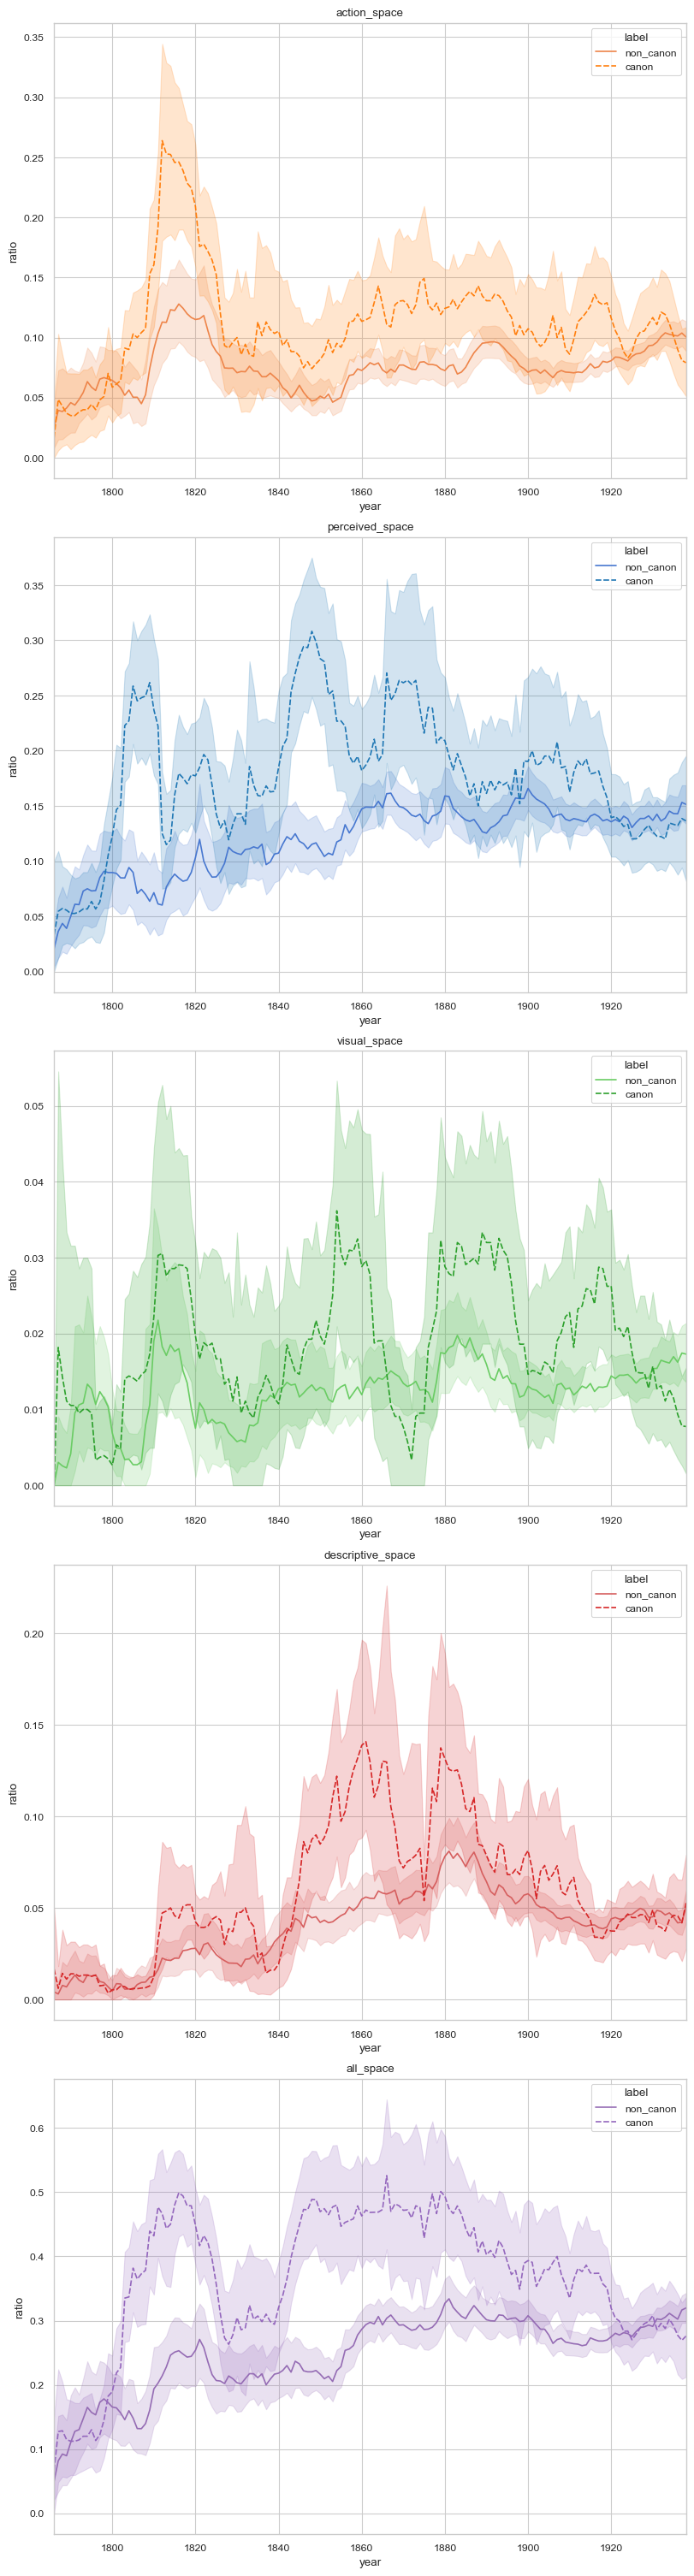

In [16]:
plot_compare(dfs, palettes)